In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 


In [2]:
df = pd.read_csv("./hdata.csv")

                    State  VotingPercentage
0                 Hamburg              80.0
1                 Bavaria              75.0
2      Schleswig-Holstein              72.0
3  North Rhine-Westphalia              71.0
4       Baden-Württemberg              70.0
Index(['State', 'VotingPercentage'], dtype='object')


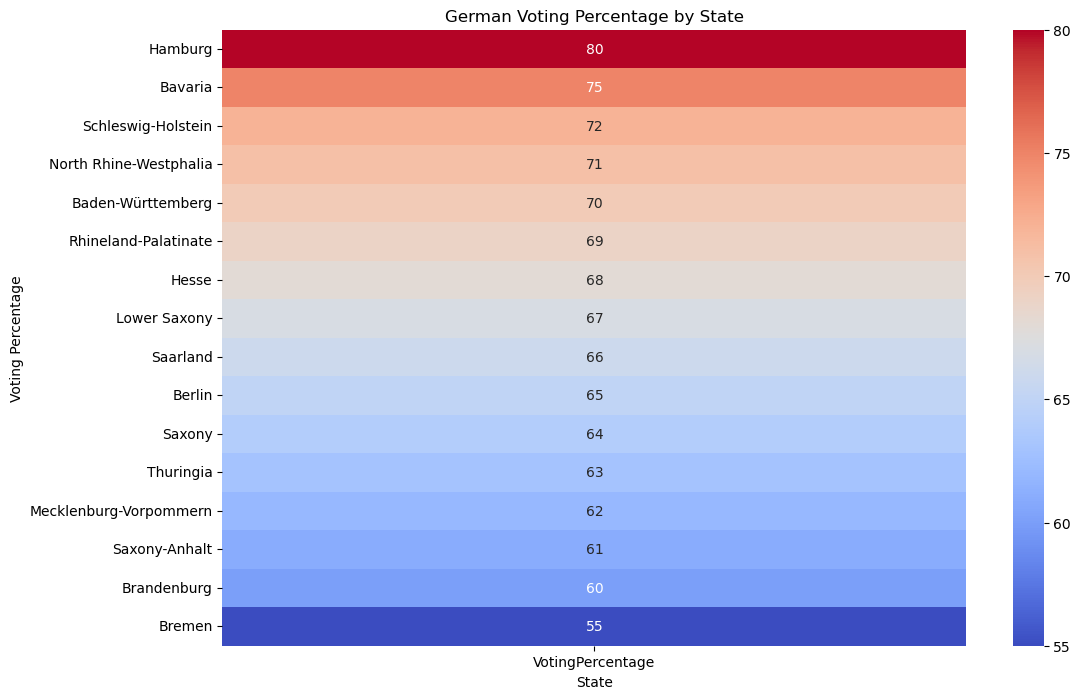

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('./hdata.csv')

# Inspect the DataFrame
print(df.head())
print(df.columns)

# Set the index to 'State'
df.set_index('State', inplace=True)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, cmap="coolwarm", cbar=True)

plt.title("German Voting Percentage by State")
plt.xlabel("State")
plt.ylabel("Voting Percentage")
plt.xticks(rotation=0)
plt.show()



In [27]:
""" import geopandas as gpd

# Path to the shapefile components
shapefile_path = './de_shp'

# Load the shapefile
gdf = gpd.read_file(shapefile_path)

# Inspect the GeoDataFrame to understand its structure
print(gdf.head())
print(gdf.columns)

 """

#plotly 


" import geopandas as gpd\n\n# Path to the shapefile components\nshapefile_path = './de_shp'\n\n# Load the shapefile\ngdf = gpd.read_file(shapefile_path)\n\n# Inspect the GeoDataFrame to understand its structure\nprint(gdf.head())\nprint(gdf.columns)\n\n "

In [ ]:
import pandas as pd 

data = {
    
}

In [1]:
import pandas as pd
import folium
import json

# Load the voting data
voting_data = pd.read_csv('./hdata.csv')
voting_data['State'] = voting_data['State'].str.lower()

# Load the GeoJSON file
with open('./de.json', 'r') as file:
    geojson_data = json.load(file)

# Add voting data to the GeoJSON
for feature in geojson_data['features']:
    state_name = feature['properties']['name'].lower()  # Adjust according to your GeoJSON structure
    if state_name in voting_data['State'].values:
        voting_percentage = voting_data[voting_data['State'] == state_name]['VotingPercentage'].values[0]
        feature['properties']['voting_percentage'] = voting_percentage
    else:
        feature['properties']['voting_percentage'] = None


# Initialize the folium map
m = folium.Map(location=[51.1657, 10.4515], zoom_start=6)

# Define a color scale
def get_color(voting_percentage):
    if voting_percentage is None:
        return '#8c8c8c'  # Gray for missing data
    elif voting_percentage >= 75:
        return '#800026'  # Dark red
    elif voting_percentage >= 70:
        return '#BD0026'  # Red
    elif voting_percentage >= 65:
        return '#E31A1C'  # Light red
    elif voting_percentage >= 60:
        return '#FC4E2A'  # Orange
    else:
        return '#FEB24C'  # Yellow

# Add the GeoJSON data to the map
folium.GeoJson(
    geojson_data,
    style_function=lambda feature: {
        'fillColor': get_color(feature['properties']['voting_percentage']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['name', 'voting_percentage'],
        aliases=['State', 'Voting Percentage'],
        localize=True
    )
).add_to(m)

# Display the map
m.save('german_voting_map.html')

"https://www.gut-leben-in-deutschland.de/indicators/democracy-and-freedom/voter-turnout/"



/tmp/ipykernel_48634/2537453181.py:46: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


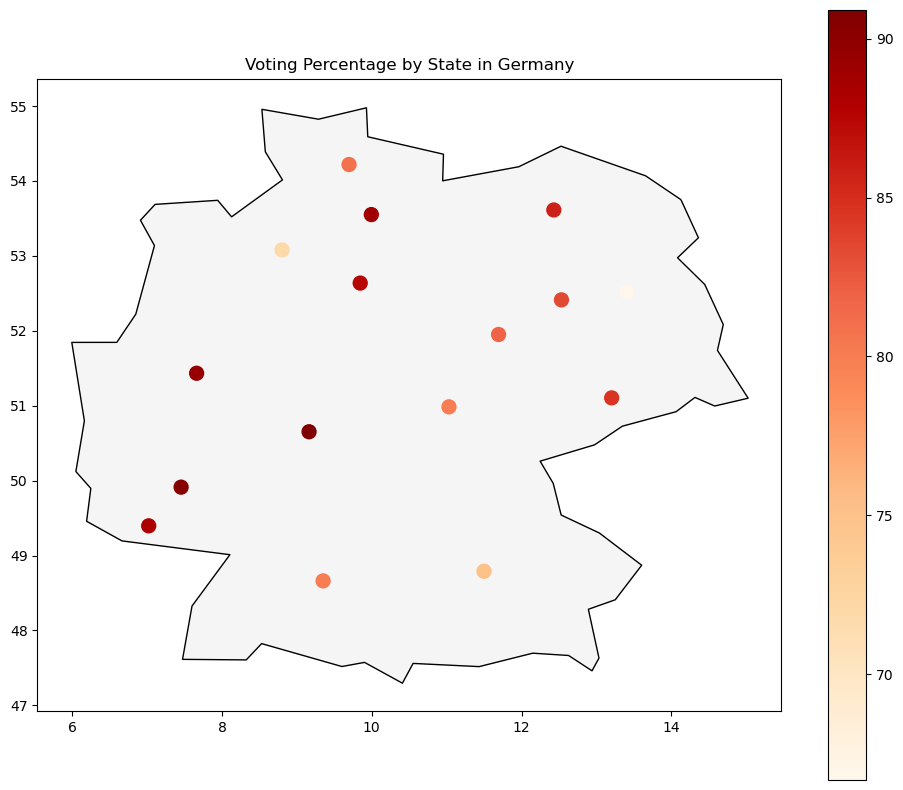

In [35]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Data preparation
data = {
    'State': ['Baden-Württemberg', 'Bavaria', 'Berlin', 'Brandenburg', 'Bremen', 
              'Hamburg', 'Hesse', 'Lower Saxony', 'Mecklenburg-Vorpommern', 
              'North Rhine-Westphalia', 'Rhineland-Palatinate', 'Saarland', 
              'Saxony', 'Saxony-Anhalt', 'Schleswig-Holstein', 'Thuringia'],
    'Allowed_Voters': [100, 200, 150, 300, 250, 180, 220, 160, 140, 190, 210, 170, 130, 110, 105, 100],
    'Voted': [80, 150, 100, 250, 180, 160, 200, 140, 120, 170, 190, 150, 110, 90, 85, 80]
}

df = pd.DataFrame(data)
df['Voting_Percentage'] = (df['Voted'] / df['Allowed_Voters']) * 100

# Coordinates for each state center (approximate for illustration purposes)
state_coords = {
    'Baden-Württemberg': (48.6616, 9.3501),
    'Bavaria': (48.7904, 11.4979),
    'Berlin': (52.5200, 13.4050),
    'Brandenburg': (52.4125, 12.5316),
    'Bremen': (53.0793, 8.8017),
    'Hamburg': (53.5511, 9.9937),
    'Hesse': (50.6521, 9.1624),
    'Lower Saxony': (52.6367, 9.8451),
    'Mecklenburg-Vorpommern': (53.6127, 12.4296),
    'North Rhine-Westphalia': (51.4332, 7.6616),
    'Rhineland-Palatinate': (49.9130, 7.4546),
    'Saarland': (49.3964, 7.0220),
    'Saxony': (51.1045, 13.2017),
    'Saxony-Anhalt': (51.9503, 11.6923),
    'Schleswig-Holstein': (54.2194, 9.6961),
    'Thuringia': (50.9848, 11.0299)
}

# Adding coordinates to the dataframe
df['Coordinates'] = df['State'].map(state_coords)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Coordinates'].apply(lambda x: x[1]), df['Coordinates'].apply(lambda x: x[0])))

# Create a plot
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
germany = world[world.name == "Germany"]
germany.plot(ax=ax, color='whitesmoke', edgecolor='black')

# Normalize the voting percentage
vmin, vmax = df['Voting_Percentage'].min(), df['Voting_Percentage'].max()
gdf.plot(ax=ax, marker='o', column='Voting_Percentage', cmap='OrRd', markersize=100, legend=True, vmin=vmin, vmax=vmax)

# Adding a title
plt.title('Voting Percentage by State in Germany')
plt.show()


In [2]:
import pandas as pd
import folium
import json

# Voting data by state
voting_data = {
    'Baden-Württemberg': 77.8,
    'Bayern': 79.9,
    'Berlin': 69.5,
    'Brandenburg': 75.6,
    'Bremen': 71.9,
    'Hamburg': 77.8,
    'Hessen': 76.2,
    'Mecklenburg-Vorpommern': 71.1,
    'Niedersachsen': 74.7,
    'Nordrhein-Westfalen': 76.4,
    'Rheinland-Pfalz': 77.2,
    'Saarland': 77.3,
    'Sachsen': 76.5,
    'Sachsen-Anhalt': 67.9,
    'Schleswig-Holstein': 78.2,
    'Thüringen': 74.9
}

# Load the GeoJSON file
with open('./de.json', 'r') as file:
    geojson_data = json.load(file)

# Add voting data to the GeoJSON
for feature in geojson_data['features']:
    state_name = feature['properties']['name']
    if state_name in voting_data:
        voting_percentage = voting_data[state_name]
        feature['properties']['voting_percentage'] = voting_percentage
    else:
        feature['properties']['voting_percentage'] = None

# Initialize the folium map
m = folium.Map(location=[51.1657, 10.4515], zoom_start=6)

# Define a color scale
def get_color(voting_percentage):
    if voting_percentage is None:
        return '#8c8c8c'  # Gray for missing data
    elif voting_percentage >= 75:
        return '#800026'  # Dark red
    elif voting_percentage >= 70:
        return '#BD0026'  # Red
    else:
        return '#E31A1C'  # Light red

# Add the GeoJSON data to the map
folium.GeoJson(
    geojson_data,
    style_function=lambda feature: {
        'fillColor': get_color(feature['properties']['voting_percentage']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['name', 'voting_percentage'],
        aliases=['State', 'Voting Percentage'],
        localize=True
    )
).add_to(m)

# Save the map to an HTML file
m.save('final_german_voting_map.html')


                Bundesland  Prozente
0        Baden-Württemberg      77.8
1                   Bayern      79.9
2                   Berlin      69.5
3              Brandenburg      75.6
4                   Bremen      71.9
5                  Hamburg      77.8
6                   Hessen      76.2
7   Mecklenburg-Vorpommern      71.1
8            Niedersachsen      74.7
9      Nordrhein-Westfalen      76.4
10         Rheinland-Pfalz      77.2
11                Saarland      77.3
12                 Sachsen      76.5
13          Sachsen-Anhalt      67.9
14      Schleswig-Holstein      78.2
15               Thüringen      74.9


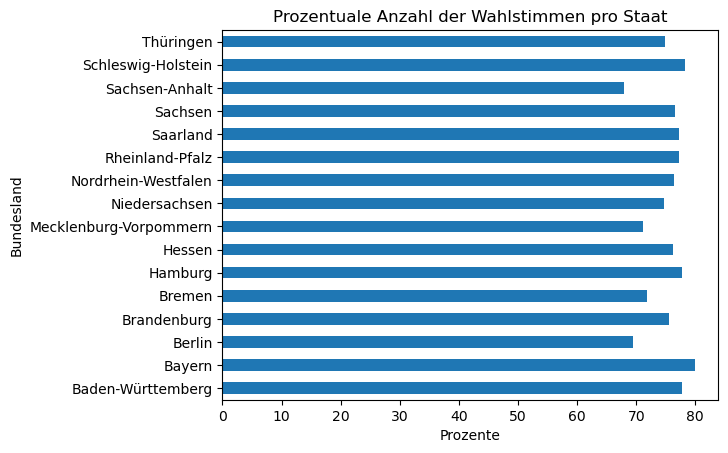

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
voting_data = pd.read_csv("./hdata.csv")

# Display the DataFrame
print(voting_data)

# Plot the DataFrame as a horizontal bar chart
voting_data.plot(kind='barh', x='Bundesland', y='Prozente', legend=False)
plt.title('Prozentuale Anzahl der Wahlstimmen pro Staat')
plt.xlabel('Prozente')
plt.ylabel('Bundesland')
plt.show()



                Bundesland  Prozente
0        Baden-Württemberg      77.8
1                   Bayern      79.9
2                   Berlin      69.5
3              Brandenburg      75.6
4                   Bremen      71.9
5                  Hamburg      77.8
6                   Hessen      76.2
7   Mecklenburg-Vorpommern      71.1
8            Niedersachsen      74.7
9      Nordrhein-Westfalen      76.4
10         Rheinland-Pfalz      77.2
11                Saarland      77.3
12                 Sachsen      76.5
13          Sachsen-Anhalt      67.9
14      Schleswig-Holstein      78.2
15               Thüringen      74.9


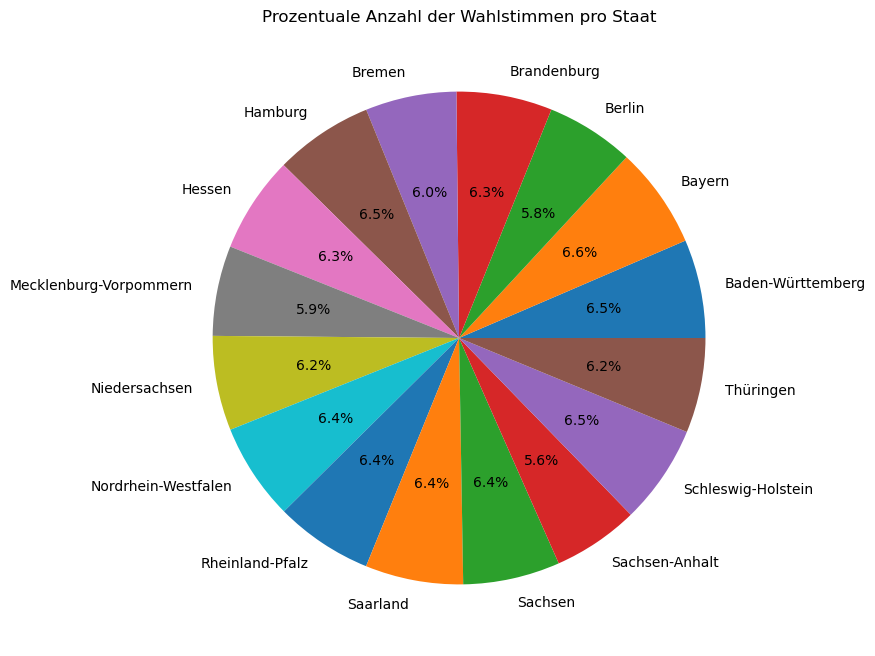

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('./hdata.csv')

# Display the DataFrame
print(df)

# Plot the DataFrame as a pie chart
df.set_index('Bundesland').plot(kind='pie', y='Prozente', legend=False, autopct='%1.1f%%', figsize=(8, 8))

plt.title('Prozentuale Anzahl der Wahlstimmen pro Staat')
plt.ylabel('')  # Hide the y-label for a cleaner look
plt.show()


In [27]:
import plotly.express as px

# Sample data
data = {
    'Bundesland': ['Baden-Württemberg', 'Bayern', 'Berlin', 'Brandenburg'],
    'Stimmen in Prozent': [77.8, 79.9, 69.5, 75.6]
}

df = pd.DataFrame(data)

# Create a bar chart
fig = px.bar(df, x='Bundesland', y='Stimmen in Prozent', title='Voting Percentages by State')

# Customize the layout
fig.update_layout(
    xaxis_title='Bundesland',
    yaxis_title='Prozente',
    title='Prozentuale Anzahl der Wahlstimmen pro Staat'
)

# Show the customized figure



ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['State', 'Percentage'] but received: Bundesland